**Task A:**
*Derive the probability density function $p(x|Θ) $(see Fig. 1B) for this model.*

*Solution:*

We can use the product rule in order to get p(x|Θ). This result was given in the lecture.


$p(x|Θ) = \sum_{c=1}^{2}p(x|c,Θ)·p(c|Θ)=p(x|c=1,Θ)·p(c=1|Θ)+p(x|c=2,Θ)·p(c=2|Θ)=$

$$\frac{1}{\sqrt{2\pi\sigma_1}}exp(-\frac{(x-\mu_1)^2}{2\sigma_1^2})*\pi_1+\frac{1}{\sqrt{2\pi\sigma_2}}exp(-\frac{(x-\mu_2)^2}{2\sigma_2^2})*(1-\pi_1)$$


**Task B:**
Using the values $π_1 = 0.4, π_2 = 0.6, μ_1 = −2, μ_2 = 4, σ_1^2 = 1, σ_2^2 = 10 $ for the parameters,
plot the probability density function (pdf) obtained in Task A.

*Solution:*

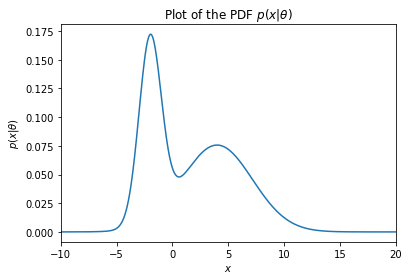

In [2]:

import numpy as np

from scipy.stats import norm

from matplotlib import pyplot as plt

# Define the distributions to be plotted

sigma_values = [1,np.sqrt(10)]

mu = [-2,4]

pi = 0.4

N=1000

x = np.linspace(-10, 20, N)

from matplotlib import pyplot as plt

# Define the distributions to be plotted
sigma_values = [1,np.sqrt(10)]

mu = [-2,4]


dist1 = norm(mu[0],sigma_values[0])

dist2 = norm(mu[1],sigma_values[1])

pdft= pi*dist1.pdf(x)+(1-pi)*dist2.pdf(x)


plt.plot(x, pdft)

plt.xlim(-10, 20)

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.title(r'Plot of the PDF $p(x|{\theta})$')

plt.show()

    

Task C:
Generate 1000 data points using the generative model described above (equations 1 and
2) and the parameters given in Task B). Plot the data points using a one-dimensional plot
(scatter-plot).

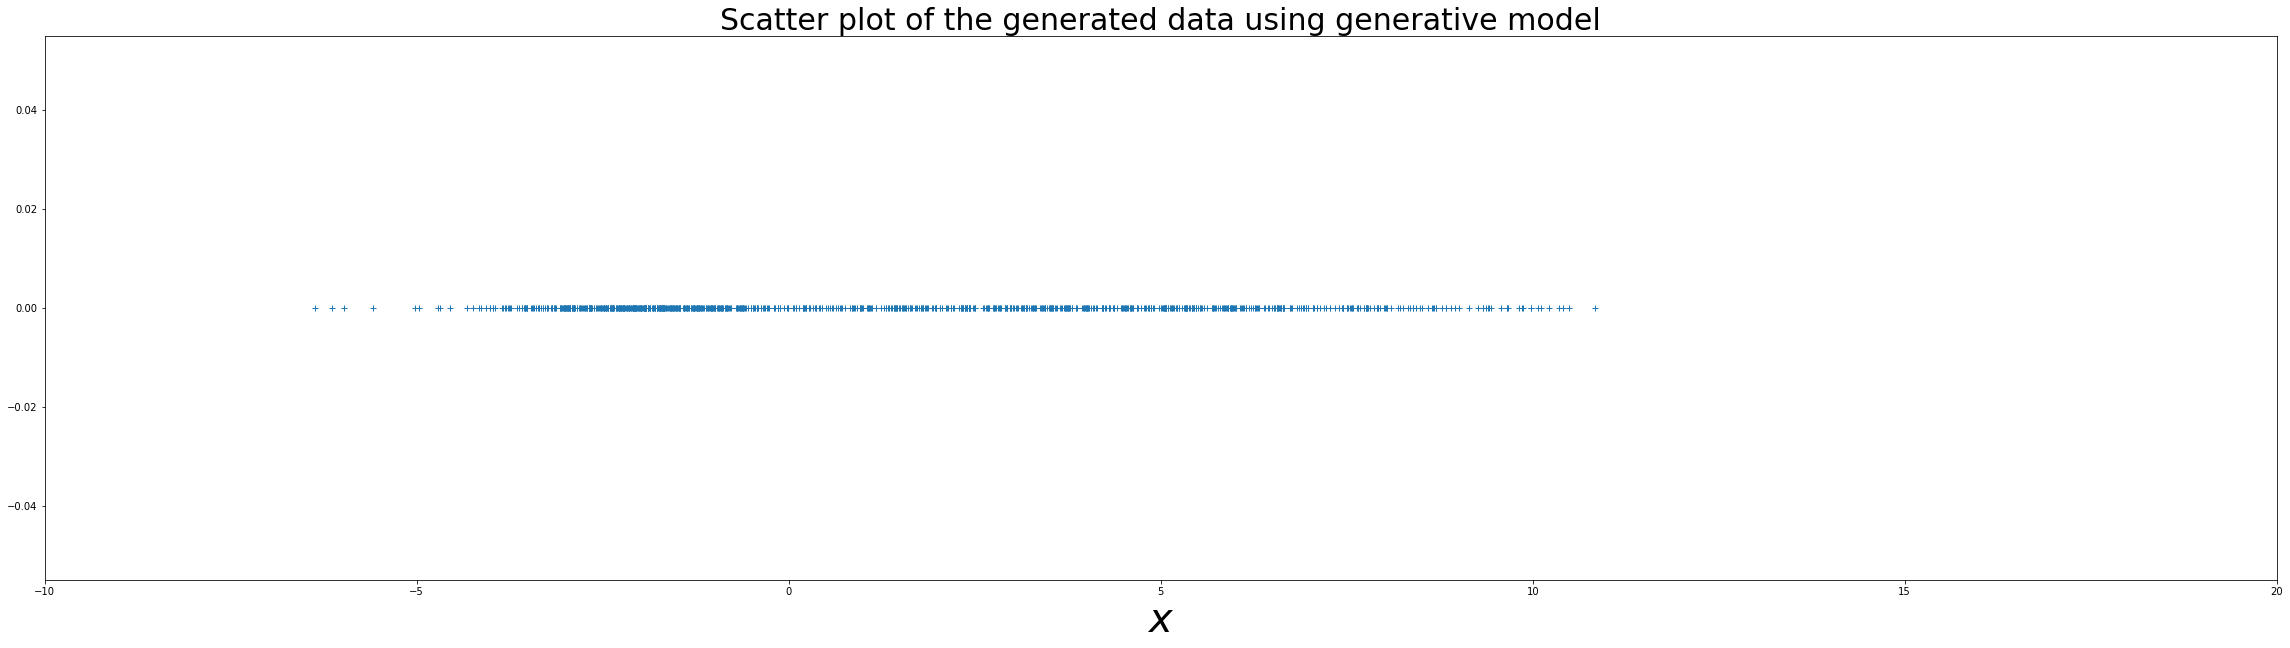

In [4]:
import math

def generate_x(N, pi_1,sigma_sq_1,sigma_sq_2,mu_1,mu_2):
    
    N1=math.floor(N*pi)

    N2=N-N1
    
    generated_x=np.append(np.random.normal(mu_1 , sigma_sq_1, N1), np.random.normal(mu_2, sigma_sq_2, N2))
    
    return generated_x

generated_x=generate_x(N,pi,sigma_values[0],sigma_values[1],mu[0],mu[1])


plt.figure(figsize=(40,10))

plt.plot(generated_x, len(generated_x)*[0] , '+')

plt.xlim(-10, 20)

plt.xlabel('$x$', fontsize=40)

plt.title('Scatter plot of the generated data using generative model', fontsize=30)

plt.show()

Task D:
Using the data points generated in Task C), divide the x-dimension into fty equally sized
bins and compute a histogram on the interval [-10; 20].

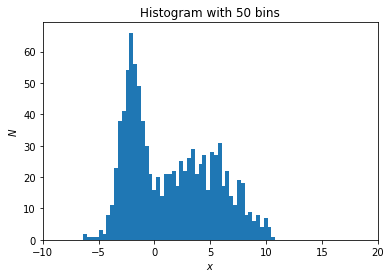

In [5]:
plt.hist(generated_x, bins=50)  

plt.title("Histogram with 50 bins")

plt.xlim(-10, 20)

plt.xlabel('$x$')

plt.ylabel('$N$')

plt.show()


Task E:
Normalize the heights of the bars in Task D) such that they represent an approximation
to the probability density in the interval [-10; 20].

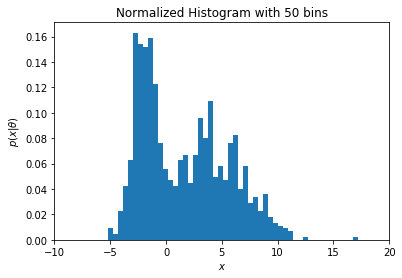

In [4]:
plt.hist(generated_x, bins=50, density=True)  

plt.title("Normalized Histogram with 50 bins")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()

Task F:
Re-plot the pdf used in Task B) together with the normalized histogram obtained in Task
E) in the same figure. Try out different numbers of bins and data points. Does the density
estimation in Task E) approximate the true underlying density p(xj) in Task B) equally
well for all numbers of bins and data points? Why (not)?

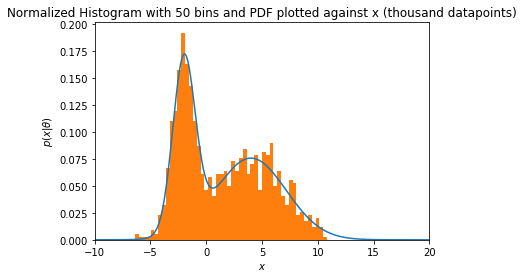

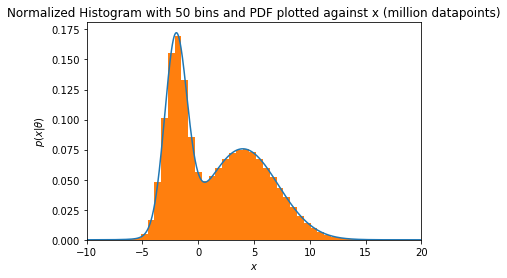

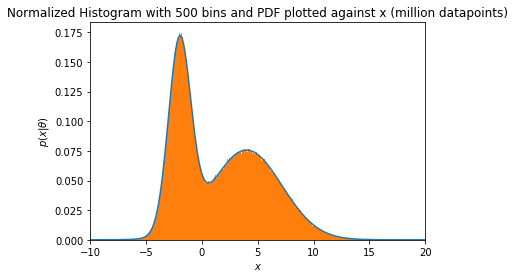

In [6]:
#Plot of Histogram and PDF with 50 bins and 1000 data points
plt.plot(x, pdft)

plt.hist(generated_x, bins=50, density=True,orientation = u'vertical')

plt.title("Normalized Histogram with 50 bins and PDF plotted against x (thousand datapoints)")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()

#Plot of Histogram and PDF with 50 bins and a million data points
generated_x_million=generate_x(1000000,pi,sigma_values[0],sigma_values[1],mu[0],mu[1])

plt.plot(x, pdft)

plt.hist(generated_x_million, bins=50, density=True,orientation = u'vertical')

plt.title("Normalized Histogram with 50 bins and PDF plotted against x (million datapoints)")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()

#Plot of Histogram and PDF with 500 bins and a million data points
plt.plot(x, pdft)

plt.hist(generated_x_million, bins=500, density=True,orientation = u'vertical')

plt.title("Normalized Histogram with 500 bins and PDF plotted against x (million datapoints)")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()

Answer Task F:
As the interval window, it starts going from being a discrete value sum to a continous valued integral like situation. But if the bins equal to the datapoints number, there's not enough points to average.

Task G:
Compute the log-likelihood for N data points under the generative model given in equa-
tions 1 and 2.

In [1]:
def log_likelihood(generated_x, pi, mu1, sigma1, mu2, sigma2):
    
    sum_C=0 #Initialize sum over classes
    sum_N=0
    
    N=len(generated_x)
    
    dist1 = norm(mu1,sigma1)

    dist2 = norm(mu2,sigma2)

    for i in range(N):

        sum_C=pi*dist1.pdf(generated_x[i]) + (1-pi)*dist2.pdf(generated_x[i])

        sum_C_log=np.log(sum_C)
        
        sum_N+=sum_C_log
    
    return sum_N




def plot_log_likelihood(pi,sigma1,sigma2,mu1,mu2,parameter_no):
    step=11

    N_int=np.arange(0, step)

    log_likelihood_values=np.zeros(step)

    for i in range(step):

        x=np.linspace(0, step-1, step)

        N_float=2**x[i]

        N_int[i]=math.floor(N_float)


        generated_x_values=generate_x(N_int[i],pi,sigma1,sigma2,mu1,mu2)

        log_likelihood_values[i]=log_likelihood(generated_x_values, pi, mu1, sigma1, mu2, sigma2)
        
    plt.figure(figsize=(10,5))

    plt.plot(N_int, log_likelihood_values)

    plt.xlabel('$N$')

    plt.ylabel(r'$\mathcal{L}(\theta)$')

    plt.title(r'Log-likelihood $\mathcal{L}(\theta)$ for N datapoints using paramters' + parameter_no, fontsize=15)

    plt.show()
    
plot_log_likelihood(pi,sigma_values[0],sigma_values[1],mu[0],mu[1], r'$(\theta_i)$')

NameError: name 'pi' is not defined

Task H:
Evaluate the log-likelihood computed in Task G) using the 1000 data points you have generated in Task C). What is the log-likelihood for other parameters? What do you observe
for more and for less data points?

Log-likelihood using the 1000 datapoints with intial parameters generated is -2596.7417737667565


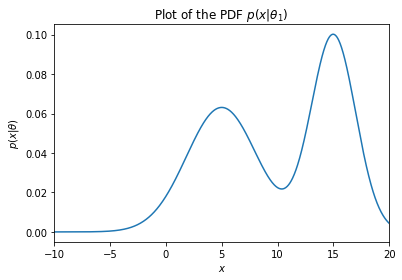

Log-likelihood using the 1000 datapoints generated with different paramters:
pi = 0.5
µ_1 = 5
µ_2 = 15
σ_1 =  3.1622776601683795
σ_2 =  2.0
Log-likehood: -2929.5584798934974


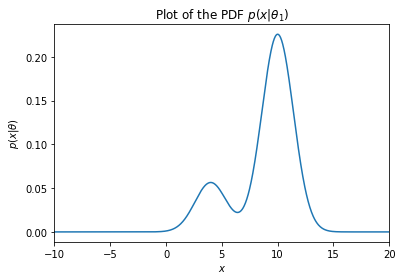

Log-likelihood using the 1000 datapoints generated with different paramters:
pi = 0.2
µ_1 = 4
µ_2 = 10
σ_1 =  1.4142135623730951
σ_2 =  1.4142135623730951
Log-likehood: -2497.682397938462


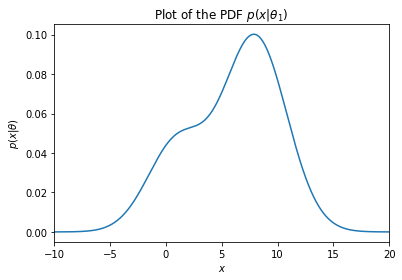

Log-likelihood using the 1000 datapoints generated with different paramters:
pi = 0.7
µ_1 = 8
µ_2 = 1
σ_1 =  2.8284271247461903
σ_2 =  2.6457513110645907
Log-likehood: -3019.53950252573


In [103]:
print('Log-likelihood using the 1000 datapoints with intial parameters generated is', log_likelihood(generated_x, pi, mu[0], sigma_values[0], mu[1], sigma_values[1]))

#Change parameters in Distribution 1 and 2
def diff_param(pi, mu1, sigma1, mu2, sigma2):

    dist1 = norm(mu1,sigma1)

    dist2 = norm(mu2,sigma2)

    pdft= pi*dist1.pdf(x)+(1-pi)*dist2.pdf(x)

    plt.plot(x, pdft)

    plt.xlim(-10, 20)

    plt.xlabel('$x$')

    plt.ylabel(r'$p(x|\theta)$')

    plt.title(r'Plot of the PDF $p(x|{\theta_1})$')

    plt.show()
    
    new_generated_x=generate_x(N,pi,sigma1,sigma2,mu1,mu2)
    
    print('Log-likelihood using the 1000 datapoints generated with different paramters:')
    print('pi =', pi)
    print('µ_1 =', mu1)
    print('µ_2 =', mu2)
    print('σ_1 = ', sigma1)
    print('σ_2 = ', sigma2)
    print('Log-likehood:', log_likelihood(new_generated_x,pi, mu1, sigma1, mu2, sigma2))
    
diff_param(0.5, 5, np.sqrt(10), 15, np.sqrt(4))

diff_param(0.2, 4, np.sqrt(2), 10, np.sqrt(2))

diff_param(0.7, 8, np.sqrt(8), 1, np.sqrt(7))

Answer Task H:
Log-likelihood using the 1000 datapoints with intial parameters generated is -2596.7417737667565
With more datapoints N, the log likelihood decreases linearly. 
By changing the paramters, there is a different in log likelihood but not as major as with changing the number of datapoints. 

Exercise 2

Consider the general form of a Mixture of Gaussians Model (MoG):

$p(c|\theta)=\pi_c$ with $(c=1,...,C);  \quad \Sigma_{c=1}^{C} \pi_c=1$
$\quad p(\vec{x}|c,\theta)=\mathcal{N}(\vec{x},\vec{\mu_c},\theta)$

Use the equations for the E-step and M-step of the Expectation Maximization approach,
which were given in the lecture, to derive the update rules for:

**Task A**

$ \vec{\mu_c}$ with $c=1,...,C.$

Solution:

From our lecture we already know the form of the free energy. The algorithm of EM was already given in class but now we need to extend it in a linear algebra form. We are not going to write the hole algorithm because it's consistenly the same rather than focus on the E-Step and M-Step which are going to be slightly different.

*E-Step*

This is E-Step it's not so different. Just we need to adjust our denominator for all posible clases

$$\vec{q}(c;\theta^{old})=p(\vec{x}|c,\theta^{old})p(c|\theta^{old}) =\frac{ \pi_c·exp(-\frac{1}{2}(\vec{x}-\vec{\mu_c})^t\Sigma_c^{-1}(\vec{x}-\vec{\mu_c}))}{\Sigma_{c=1}^{C} \pi_c·exp(-\frac{1}{2}(\vec{x}-\vec{\mu_c})^t\Sigma_c^{-1}(\vec{x}-\vec{\mu_c}))}$$


*M-Step*

Now our $\vec{q}$ is going to be fixed after our last computation.

$$\frac{d}{d\theta}\xi(\vec{q}(c;\theta^{old}),\theta)=0$$

That means we need to maximaze the free energy for the $\vec{\mu_c}$ and for $\vec{\sigma_c}$

Let's do the first one:


$$\frac{d}{d\vec{\mu_c}}\xi(...)=0$$
$$0=\Sigma_n\Sigma_c\vec{q}(c,\theta^{old})\frac{d}{d\vec{\mu_{c'}}}(log(\mathcal{N}))=0=\Sigma_n\Sigma_c\vec{q}(c,\theta^{old})·(0+0+\frac{-1}{2}[\frac{d}{d\mu_{c'}}(\vec{x}-\vec{\mu_c})^t\Sigma_c^{-1}(\vec{x}-\vec{\mu_c})])$$

We stress the fact that the n indices are the indices of the $\vec{q}$ vector.

Now using the second equation of our exercise sheet so this derivate becomes

$$-2\Sigma_{c'}^{-1}(\vec{x}-\vec{\mu_{c'}})$$
and isolating the $\vec{\mu_c}$ vector then we have 
$$\vec{\mu_{c}}=\frac{\Sigma_n\vec{q}(c;\theta^{old})\vec{x}}{\Sigma_n\vec{q}(c;\theta^{old})}$$



The second one:

$0=\frac{d}{d\Sigma_c}\xi(q,\theta)$

$$\bullet \quad-\frac{1}{2}\frac{d}{d\Sigma_{c'}}log(det[2\pi\Sigma_c])=Tr((2\pi\Sigma_c)^{-1}\frac{d(2\pi\Sigma_c)}{d\Sigma_{c'}}$$











